In [1]:
#load_ext line_profiler

import csv,operator,sys,os
import numpy as np
import sklearn
import json
import FeatureGenerators.ReadData as ReadData
import time
from functools import reduce

sys.path.append('arch-forest/data/adult/')
sys.path.append('arch-forest/data/bank/')
sys.path.append('arch-forest/data/wine-quality/')
sys.path.append('arch-forest/data/')
sys.path.append('arch-forest/code/')
import trainForest
import Tree


filesPath = "/home/falkhoury/Study/Lab/Project/frequentTreesInRandomForests/arch-forest/data/"
dataPath = "/home/falkhoury/Study/Lab/Project/frequentTreesInRandomForests/arch-forest/data/"
frequentTreesPath = "/home/falkhoury/Study/Lab/Project/frequentTreesInRandomForests/forests/rootedFrequentTrees/"
resultsPath = "/home/falkhoury/Study/Lab/Project/frequentTreesInRandomForests/InferenceComparison/"

/home/falkhoury/anaconda3/envs/py3k/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:

from FeatureGenerators.ReadData import readDataAdult,readWine, readWineTest
dataSet='spambase'
if (dataSet == 'adult'):
    X_train,Y_train = ReadData.readDataAdult('train')
    X_test,Y_test = ReadData.readDataAdult('test')
if (dataSet == 'spambase'):
    X_train,Y_train = ReadData.readDataSpambase('train')
    X_test,Y_test = ReadData.readDataSpambase('test')
if (dataSet == 'wine-quality'):
        X_train,Y_train = ReadData.readWine()
        #X_test,Y_test = ReadData.readWineTest()
print(len(X_train))


4601


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.estimator_checks import check_estimator
from sklearn.metrics import accuracy_score

import FeatureGenerators.DecisionSnippetFeatures

In [17]:
# Classification
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.estimator_checks import check_estimator
from sklearn.metrics import accuracy_score
    
import FeatureGenerators.DecisionSnippetFeatures

results_list = []
time_list = []
rf_depth = 5
scoring_function = 'accuracy'
pattern_max_size=6
variant = 'NoLeafEdges'

countsList =[]

for rf_depth in (5,10,15,20):
  for frequency in range(2,26,1):
    
    
    rootedFrequentTrees = "RF_"+str(rf_depth)+"_t"+str(frequency)
    f = open(frequentTreesPath+dataSet+'/'+variant+'/leq'+str(pattern_max_size)+'/'+rootedFrequentTrees+'.json')
    frequentpatterns = json.load(f)
    f.close()

    dsf = FeatureGenerators.DecisionSnippetFeatures.FrequentSubtreeFeatures(map(lambda x: x['pattern'], frequentpatterns[-200:])) 

    fts = dsf.fit_transform(X_test,1)

    compareCount = 0
    for i in range(0,len(X_test)):
        for nodesNumber in fts[i]:
            compareCount += nodesNumber
    
    
    print(round(compareCount/len(X_test),1))
    countsList.append('RF_'+str(rf_depth)+'_t'+str(frequency)+','+str(round(compareCount/len(X_test),1))+',\n')

# Complete

for rf_depth in (5,10,15,20):
    
    f = open(resultsPath+'/'+dataSet+'/'+'RF_'+str(rf_depth)+'.json')
    frequentpatterns = json.load(f)
    f.close()

    dsf = FeatureGenerators.DecisionSnippetFeatures.FrequentSubtreeFeatures(map(lambda x: x['pattern'], frequentpatterns[-200:]))  

    fts = dsf.fit_transform(X_test,1)

    compareCount = 0
    for i in range(0,len(X_test)):
        for nodesNumber in fts[i]:
            compareCount += nodesNumber
    
    
    print(round(compareCount/len(X_test)))
    countsList.append('RF_'+str(rf_depth)+','+str(round(compareCount/len(X_test),1))+',\n')    
    


file= open(resultsPath+'/'+dataSet+'/'+dataSet+'_comparisons_count.csv',"w")
for count in countsList:
    file.write(count)
#file= open(resultsPath+dataSet+'_RF5real_'+'count.csv',"w") now

file.close()
    
#print(len(X_test))


   
    
    
    
  
'''
f= open(resultsPath+dataSet+'/Results_'+variant+'/leq'+str(pattern_max_size)+'/'+'RF_'+str(rf_depth)+'_'+scoring_function+'.csv',"a")
for line in results_list:
    f.write(line)
f.close()

f= open(resultsPath+dataSet+'/Results_'+variant+'/leq'+str(pattern_max_size)+'/'+'RF_'+str(rf_depth)+'_'+scoring_function+'_time.csv',"a")
for line in time_list:
    f.write(line)
f.close()
'''

78.3
20.0
7.0
5.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
199.1
174.0
82.0
41.0
17.0
12.0
4.0
2.0
2.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
199.9
199.0
193.0
100.0
59.0
32.0
18.0
11.0
7.0
5.0
3.0
2.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
202.1
199.0
199.0
157.0
85.0
55.0
40.0
25.0
15.0
10.0
7.0
3.0
2.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
124.0
188.0
249.0
285.0


'\nf= open(resultsPath+dataSet+\'/Results_\'+variant+\'/leq\'+str(pattern_max_size)+\'/\'+\'RF_\'+str(rf_depth)+\'_\'+scoring_function+\'.csv\',"a")\nfor line in results_list:\n    f.write(line)\nf.close()\n\nf= open(resultsPath+dataSet+\'/Results_\'+variant+\'/leq\'+str(pattern_max_size)+\'/\'+\'RF_\'+str(rf_depth)+\'_\'+scoring_function+\'_time.csv\',"a")\nfor line in time_list:\n    f.write(line)\nf.close()\n'

In [18]:
import csv


scoring_function = 'accuracy'
dataset = "spambase"
variant = "NoLeafEdges"
pattern_max_size = 6
filesPath = "/home/falkhoury/Study/Lab/Project/frequentTreesInRandomForests/forests/rootedFrequentTrees"
comparisonCountPath = "/home/falkhoury/Study/Lab/Project/frequentTreesInRandomForests/InferenceComparison/"
accuracy_list = []
accuracy_list_rf = []
count_list = []
size_list_rf = []
rf_list = []



with open(comparisonCountPath+'/'+dataset+'/'+dataset+'_comparisons_count'+'.csv') as count_file:
        count_reader = csv.reader(count_file, delimiter='\n')
        line_count = 1
        for row in count_reader:
            if (line_count > 1 ):
                
                rowStr = str(row).split(',')                                       
                count_list.append(rowStr[1])
            line_count +=1    

count_file.close()



for rf_depth in (5,10,15,20):
    
    with open(filesPath+'/'+dataset+'/Results_'+variant+'/leq'+str(pattern_max_size)+'/'+'RF_'+str(rf_depth)+'_'+scoring_function+'.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='\n')
        line_count = 2
        for row in csv_reader:
            rowStr = str(row).split(',')
            if line_count < 26:
                accuracy_list.append(rowStr[1])
                rf_list.append('RF_'+str(rf_depth)+'_t'+str(line_count))
                if (line_count == 5):
                    accuracy_list_rf.append(rowStr[4])
                line_count+=1
    csv_file.close()
    
print(len(rf_list))
print(len(count_list))
print(len(accuracy_list))
    
f= open(comparisonCountPath+'/'+dataset+'/'+'comparisons_count_vs_accuracy_'+dataset+'_'+variant+'_leq'+str(pattern_max_size)+'.csv',"w")
f.write('RF,comparisons Count,accuracy,\n')
for i in range(0,len(accuracy_list)):
        f.write(rf_list[i]+','+count_list[i]+','+accuracy_list[i]+',\n')
for depth in (5,10,15,20):
        f.write('RF_'+str(depth)+','+count_list[int(depth/5) +len(accuracy_list)-1]+','+accuracy_list_rf[int(depth/5) -1]+',\n')
f.close()


print(len(accuracy_list))
for i in range(0,len(count_list)):
        print(rf_list[i]+'\n')



96
99
96


IndexError: list index out of range

0.84404665
0.85900325
0.8622587
0.8632108
124.4
246.3
340.5
401.7


/home/falkhoury/anaconda3/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/falkhoury/anaconda3/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


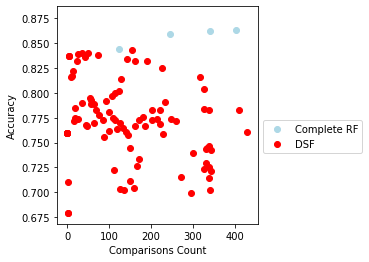

In [36]:
import matplotlib.pyplot as plt
import numpy as np

dataset = "adult"
variant = "NoLeafEdges"
pattern_max_size = 6
filesPath = "/home/falkhoury/Study/Lab/Project/frequentTreesInRandomForests/forests/rootedFrequentTrees"
resultsPath = "/home/falkhoury/Study/Lab/Project/frequentTreesInRandomForests/InferenceComparison/"
accuracy_list_dsf = []
count_list_dsf = []
accuracy_list = []
count_list = []


with open(resultsPath+'/'+dataset+'/'+'comparisons_count_vs_accuracy_'+dataset+'_'+variant+'_leq'+str(pattern_max_size)+'.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='\n')
        lineCount =1    
            
        for row in csv_reader:
                if (lineCount > 1 ):
                    rowStr = str(row).split(',')
                    if (lineCount > 97):
                        count_list.append(rowStr[1])
                        accuracy_list.append(rowStr[2])
                    else:
                        count_list_dsf.append(rowStr[1])
                        accuracy_list_dsf.append(rowStr[2])
                        
            
                    
                lineCount+=1
                
            
                
csv_file.close()


    
    
#x_axis=np.arange(1,97,1)
count = np.array(count_list, dtype=np.float32)
accuracy = np.array(accuracy_list, dtype=np.float32)

count_dsf = np.array(count_list_dsf, dtype=np.float32)
accuracy_dsf = np.array(accuracy_list_dsf, dtype=np.float32)

for n in accuracy:
    print(n)

for n in count:
    print(n)
#print('Best: '+best +': '+str(round(best_value,6)))
#diff = normal[0] - best_value 
#print('Difference from normal features: '+str(round(diff,6)))

#diff_from_rf = best_value - best_value_rf
plt.scatter(count, accuracy, c='lightblue')
plt.scatter(count_dsf, accuracy_dsf, c='red')
#plt.plot(size,accuracy,'ro')

plt.xlabel('Comparisons Count')
plt.ylabel('Accuracy')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.60, box.height])
plt.legend(['Complete RF','DSF'],bbox_to_anchor=(1.0, 0.5), loc='upper left')
plt.text(27, 0.77, '')
fig = plt.gcf()
fig.savefig('comparisons_count_'+dataset+'_'+variant+'_'+scoring_function+'.png', dpi=150)
fig.show()